In [1]:
import pandas as pd
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from scipy.stats import pearsonr
from sklearn import tree
from sklearn import ensemble

Using TensorFlow backend.


In [136]:
#Input parameters - National analysis
Data = pd.read_csv("/Volumes/Toshiba/DataScienceMasters/Deaths_from_pnuemonia_and_influneza_and_all_deaths__by_state_and_region__National_Center_For_Health_Statistics_Mortality_Surveillance_System.csv")
nationalData = Data.loc[Data['geoid']=='National']
scaler = MinMaxScaler(feature_range=(0,1))        
ageGroup = '65 years and older' #Which age group do we want to predict
pAgeGroup = '65 years and older' #which age group do we want to use to make our predictions
predictiveWindow = 16 #how many weeks into the future do we want to be able to predict
pObs = 52 #number of prior observations to use for prediction
trainTestSplit = 0.8 #Proportion of dataset to be used for training
outcome = 'Deaths from influenza' #which outcome to model
Data1 = nationalData.loc[nationalData['age']== ageGroup]
Data2 = np.asarray(Data1[[outcome]]) #Dataset containing our train and test predictions
Data3 = nationalData.loc[nationalData['age']==pAgeGroup]
Data4 = np.asarray(Data3[[outcome]]) #Dataset containing our our independent variables

xTrain = []
yTrain = []
for i in range(pObs, int((len(Data2)-pObs)*trainTestSplit-predictiveWindow)):
    yTrain.append(Data2[i+predictiveWindow])
    xTrain.append(Data4[i-pObs:i].ravel())

xTest = []
yTest = []
for i in range(int((len(Data2)-pObs)*trainTestSplit-predictiveWindow), len(Data2)-predictiveWindow):
    yTest.append(Data2[i+predictiveWindow])
    xTest.append(Data4[i-pObs:i].ravel())

48421.9767442
103.356589147
[ 1.0781111]


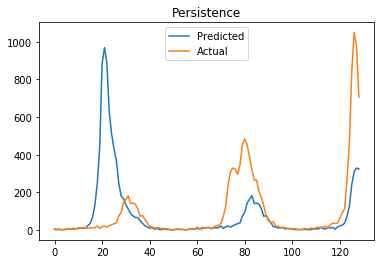

In [141]:
#Persistence

Data = pd.read_csv("/Volumes/Toshiba/DataScienceMasters/Deaths_from_pnuemonia_and_influneza_and_all_deaths__by_state_and_region__National_Center_For_Health_Statistics_Mortality_Surveillance_System.csv")
# print(Data.head(10))
nationalData = Data.loc[Data['geoid']=='National']
ageGroup = '65 years and older' #Which age group do we want to predict
pAgeGroup = '65 years and older' #which age group do we want to use to make our predictions
persistencePredictiveWindow = 52 #how many weeks into the future do we want to be able to predict
pObs = 52 #number of prior observations to use for prediction
trainTestSplit = 0.8 #Proportion of dataset to be used for training
outcome = 'Deaths from influenza' #which outcome to model
Data1 = nationalData.loc[nationalData['age']== ageGroup]
Data2 = np.asarray(Data1[[outcome]]) #Dataset containing our train and test predictions

x = []
y = []
for i in range(int((len(Data2)-pObs)*trainTestSplit), len(Data2)):
    x.append(Data2[i-persistencePredictiveWindow])
    y.append(Data2[i])

persistenceMAE = mean_squared_error(x, y)
print(persistenceMAE)
print(mean_absolute_error(x,y))
print(np.sum(np.abs(np.asarray(x)-np.asarray(y)))/sum(np.asarray(y)))

plt.clf()
plt.plot(x, label='Predicted')
plt.plot(y, label = 'Actual')
plt.legend()
plt.title('Persistence')
plt.show()


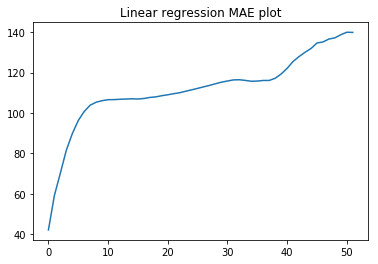

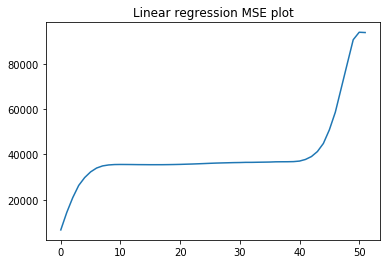

1
42.1655720468
89.7490049614
106.088218892
107.00220937
108.55349117
111.436710144
115.234883554
115.687107409
119.291908954
131.885001073
138.709799662
*****
6641.18202129
29755.5057336
35508.1161021
35461.1994549
35522.478464
35944.3608268
36364.6856071
36568.0680732
36805.8648527
44828.116247
90638.4866565


In [4]:
#Linear regression model

lm = linear_model.LinearRegression()
model = lm.fit(xTrain, yTrain)
yPredlm = model.predict(xTest)
lmMAE = mean_squared_error(yTest, yPredlm)
print(lmMAE)
print(mean_absolute_error(yTest, yPredlm))
print(sum(abs(np.asarray(yPredlm)-np.asarray(yTest)))/sum(np.asarray(yTest)))
plt.clf()
plt.plot(yPredlm, label = 'Predicted')
plt.plot(yTest, label = 'Actual')
plt.legend()
plt.title('Linear autoregression')
plt.show()
    


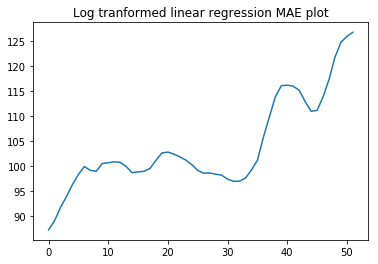

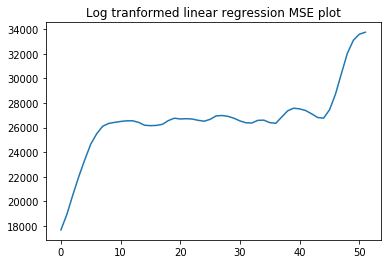

87.3089143549
96.3736623238
100.590546239
98.7632335193
102.698106218
100.368571752
98.2617265828
99.2931790744
116.141610025
111.032753319
124.834351067
*****
17681.7924951
23392.6689119
26431.1865364
26197.5543674
26767.9771993
26525.528498
26765.0097306
26610.2688778
27582.9140953
26766.9052151
33104.9207015


In [5]:
#log transform independent variables
lmxTrain = np.log(np.asarray(xTrain)+1)

lmxTest = np.log(np.asarray(xTest)+1)

lm = linear_model.LinearRegression()
logmodel = lm.fit(lmxTrain, yTrain)
logyPred = logmodel.predict(lmxTest)
MAE = mean_absolute_error(yTest, logyPred)
MSE = mean_squared_error(yTest, logyPred)
MAPE = sum(abs(np.asarray(logyPred)-np.asarray(yTest)))/sum(np.asarray(yTest))
plt.clf()
plt.plot(logyPred, label = 'Predicted')
plt.plot(yTest, label = 'Actual')
plt.legend()
plt.title('Log transformed linear autoregression')
plt.show()

/Users/vishalpatel/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


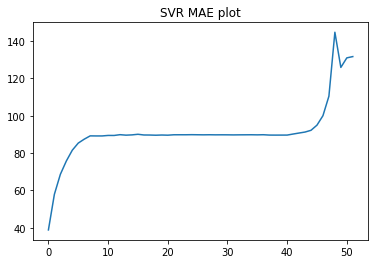

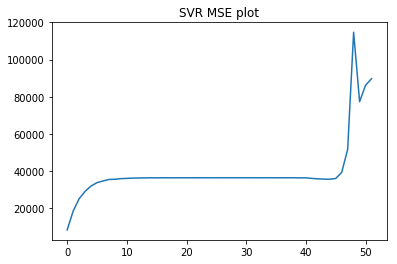

38.8697701253
81.560408061
89.2033717288
89.7689727947
89.698720541
89.8774861699
89.8155342575
89.8377722507
89.6605866595
92.2253638329
125.903845266
*****
8375.12573526
31986.8787711
35950.8604018
36402.5591971
36425.3526501
36434.0726006
36451.8041316
36440.140143
36381.3940211
35629.623921
77345.224594


In [6]:
#SVR model

xTrain = np.asarray(xTrain)
yTrain = np.asarray(yTrain)
xTest = np.asarray(xTest)
yTest = np.asarray(yTest)
svr = SVR(kernel='linear')
model1 = svr.fit(xTrain, yTrain)
yPredSVR = model1.predict(xTest)
svrMAE = mean_squared_error(yTest, yPredSVR)
print(svrMAE)
print(mean_absolute_error(yTest, yPredSVR))
print(np.sum(np.abs(yPredSVR - np.asarray(yTest)))/np.sum(yTest))
plt.clf()
plt.plot(yPredSVR, label = 'predicted')
plt.plot(yTest, label = 'actual')
plt.legend()
plt.title('SVR - Linear kernel')
plt.show()

/Users/vishalpatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishalpatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishalpatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishalpatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConve

/Users/vishalpatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishalpatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/vishalpatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishalpatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConvers

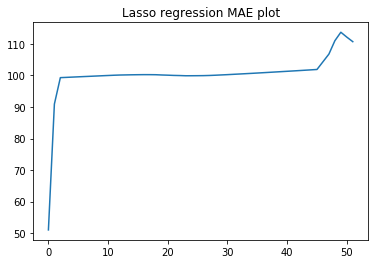

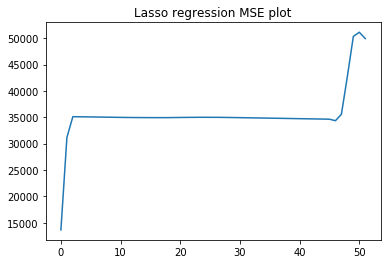

51.0325134547
99.4913728432
99.9194181261
100.224252492
100.162092025
99.9238066095
100.181875065
100.674845317
101.222513375
101.790809481
113.717096473
*****
13642.2608056
35078.8542781
34994.6037382
34936.0336793
34947.880514
34993.7521111
34944.1048053
34851.6357698
34752.5531105
34653.7960302
50329.6763725


In [7]:
#Lasso non-linear regression

np.random.seed(7)

lasso_eps = 0.0001
lasso_nalpha = 50
lasso_iter = 1000

degree_min = 1
degree_max = 3
yTrain = np.asarray(yTrain)
yTest = np.asarray(yTest)
xTrain = np.asarray(xTrain)
xTest = np.asarray(xTest)

for degree in range(degree_min, degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps = lasso_eps, n_alphas = lasso_nalpha, max_iter=lasso_iter, normalize=True,cv=10))
    model.fit(xTrain, yTrain)
    LassoPred = np.array(model.predict(xTest))
    LassoMAE = mean_squared_error(yTest, LassoPred)
    print(LassoMAE)
    print(mean_absolute_error(yTest, LassoPred))
    print(np.sum(np.abs(np.asarray(LassoPred)-np.asarray(yTest)))/np.sum(yTest))
    plt.clf()
    plt.plot(LassoPred, label = 'Predicted')
    plt.plot(yTest,label = 'Actual')
    if degree==1:
        plt.title('Lasso regression - 1st degree ploynomial')
    if degree==2:
        plt.title('Lasso regression - 2nd degree ploynomial')
    if degree==3:
        plt.title('Lasso regression - 3rd degree ploynomial')
    plt.legend()
    plt.show()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


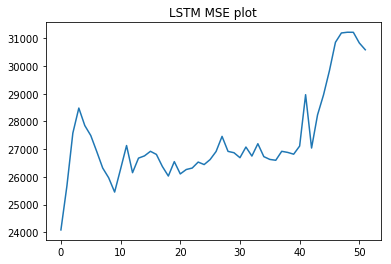

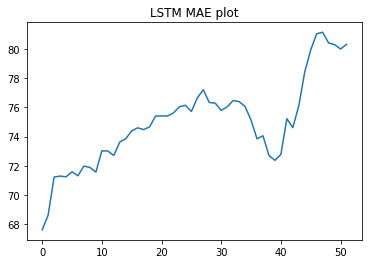

67.5861473148
71.2331626924
71.5567247165
73.8452611508
75.4096899772
76.1508770031
76.2949623371
76.0646013904
72.3669627549
78.4430200522
80.3152885467
*****
24084.3403545
27850.8021475
25450.3814982
26755.7327286
26548.7731405
26442.6856561
26869.5915067
26728.8918654
26816.7637986
28954.9162742
31215.3429393


In [11]:
#LSTM Neural network

xTrain = np.array(xTrain)    
yTrain = np.array(yTrain)
xTest = np.array(xTest)
yTest = np.array(yTest)
xTrain = np.reshape(xTrain, (xTrain.shape[0], 1, xTrain.shape[1]))
xTest = np.reshape(xTest, (xTest.shape[0], 1, xTest.shape[1]))

model = Sequential()
model.add(LSTM(500, input_shape=(1,pObs)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')
model.fit(xTrain, yTrain, epochs=100, batch_size=30, verbose=0)
trainPredict = model.predict(xTrain)
testPredict = model.predict(xTest)

MSE = mean_squared_error(yTest, testPredict)
MAE = mean_absolute_error(yTest, testPredict)
MAPE = sum(abs(np.asarray(testPredict)-np.asarray(yTest)))/sum(np.asarray(yTest))


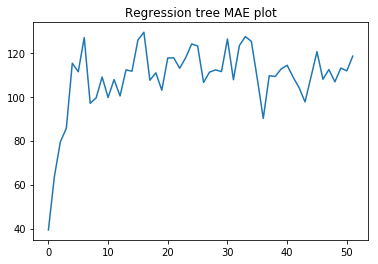

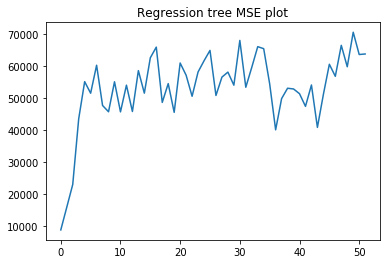

39.3798449612
115.23255814
108.945736434
111.581395349
102.937984496
123.976744186
111.426356589
125.186046512
112.604651163
108.992248062
113.023255814
*****
8685.34883721
55204.9844961
55166.1395349
51598.0465116
45570.8449612
61744.5968992
54094.3100775
65548.5968992
52908.6046512
51192.0775194
70706.7906977


In [8]:
#regression tree

model = tree.DecisionTreeRegressor()
model = model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
MSE = mean_squared_error(yTest, yPred)
MAE = mean_absolute_error(yTest, yPred)
MAPE = np.sum(np.abs(yPred-np.asarray(yTest)))/np.sum(yTest)

plt.clf()
plt.plot(yPred, label = 'predicted')
plt.plot(yTest, label = 'actual')
plt.legend()
plt.title('Regression tree')
plt.show()


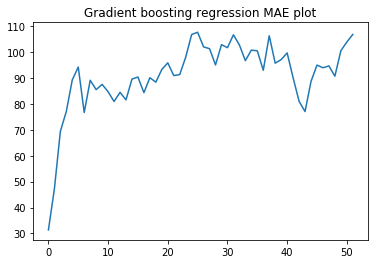

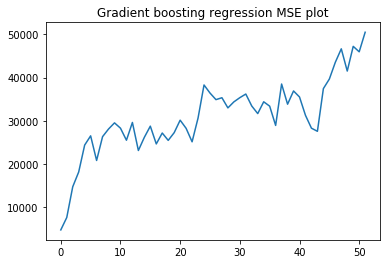

31.3562331395
89.2825213732
87.535363926
89.5831341634
93.2905170287
106.785175722
102.875778401
100.759483747
97.1064520193
88.6584155321
100.514467656
*****
4737.47305634
24379.1821383
29523.6655957
26174.5691863
27256.7999056
38296.9761283
34381.9850726
34402.3593703
36912.9136316
37459.0769056
47241.0793606


In [10]:
#Gradient boosting regression

np.random.seed(7)

xTrain = np.asarray(xTrain)
yTrain = np.asarray(yTrain)
xTrain = xTrain.reshape(xTrain.shape[0], -1)
yTrain = yTrain.reshape(yTrain.shape[0])
xTest = np.asarray(xTest)
xTest = xTest.reshape(xTest.shape[0], -1)
model = ensemble.GradientBoostingRegressor()
model = model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
MAE = mean_squared_error(yPred, yTest)
print(MAE)
print(mean_absolute_error(yPred, yTest))
print(np.sum(abs(yPred-np.asarray(yTest)))/sum(yTest))
plt.clf()
plt.plot(yPred, label='predicted')
plt.plot(yTest, label = 'actual')
plt.title('Gradient boosting')
plt.legend()
plt.show()


['geoid', 'Region', 'State', 'age', 'season', 'MMWR Year/Week', 'Deaths from influenza', 'Deaths from pneumonia', 'Deaths from pneumonia and influenza', 'All Deaths', 'Pecent of deaths due to pneumonia or influenza', 'pecent complete']
['National' nan 'Region' 'State']


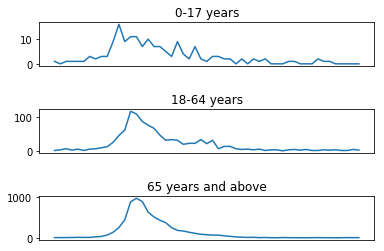

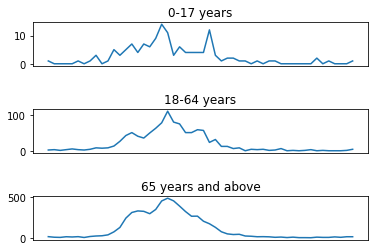

In [116]:
###Explore autocorrelation of state timeseries

rawData = pd.read_csv("/Volumes/Toshiba/DataScienceMasters/Deaths_from_pnuemonia_and_influneza_and_all_deaths__by_state_and_region__National_Center_For_Health_Statistics_Mortality_Surveillance_System.csv")
states = rawData.State.unique()
# states = list(states)
# del states[0]
# print(states)

print(list(rawData))
print(rawData['geoid'].unique())
cols = ['geoid', 'Deaths from influenza', 'MMWR Year/Week', 'age', 'season']
national = rawData[cols]
# national.set_index('MMWR Year/Week', inplace=True)
national = national.loc[national['geoid']=='National']
nationala = national.loc[national['season']=='2014-15']
national1 = nationala.loc[national['age']=='0-17 years']
national2 = nationala.loc[national['age']=='18-64 years']
national3 = nationala.loc[national['age']=='65 years and older']

nationalb = national.loc[national['season']=='2016-17']
national4 = nationalb.loc[national['age']=='0-17 years']
national5 = nationalb.loc[national['age']=='18-64 years']
national6 = nationalb.loc[national['age']=='65 years and older']



plt.clf()
plt.subplots_adjust(hspace=1.0)
plt.subplot(311)
plt.plot(national1['Deaths from influenza'])
# plt.ylabel('Number of deaths')
plt.title('0-17 years')
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.subplot(312)
plt.plot(national2['Deaths from influenza'])
plt.title('18-64 years')
# plt.ylabel('Number of deaths')
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.subplot(313)
plt.plot(national3['Deaths from influenza'])
plt.title('65 years and above')
# plt.ylabel('Number of deaths')
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.show()

plt.clf()
plt.subplots_adjust(hspace=1.0)
plt.subplot(311)
plt.plot(national4['Deaths from influenza'])
# plt.ylabel('Number of deaths')
plt.title('0-17 years')
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.subplot(312)
plt.plot(national5['Deaths from influenza'])
plt.title('18-64 years')
# plt.ylabel('Number of deaths')
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.subplot(313)
plt.plot(national6['Deaths from influenza'])
plt.title('65 years and above')
# plt.ylabel('Number of deaths')
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.show()

In [116]:
a = np.arange(10)
# a = list(a)
# del a[0]
print(np.log(a+2))
print(np.log(2))

[ 0.69314718  1.09861229  1.38629436  1.60943791  1.79175947  1.94591015
  2.07944154  2.19722458  2.30258509  2.39789527]
0.69314718056
